In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("titanic_train.csv")

In [4]:
df.head() #top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail() # back 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.columns #checking total columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# About Columns:
1. PassengerId : Id given to Passenger
2. Survived:   Survived or Dead
3. Pclass:     Passenger class 
4. Sex:        Male female or infant
5. Age:        Age of the Person
6. SibSp:      Number of Siblings or Spouse of the person on board
7. Parch:      Parents or children Onboard
8. Ticket:     Ticket Number
9. Fare:       Money paid for Journey
10. Cabin:     Name of Cabin
11. Embarked:   Port of embarkation

In [7]:
df['PassengerId'].dtype # checking data type

dtype('int64')

In [8]:
type(df) # checking class or module

pandas.core.frame.DataFrame

In [9]:
df.info() #checking information about rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


5 object based column, 2 float column, 5 integer column memory  Size= 83.7

### Checking Unique Values

In [10]:
# checking if all values are unique
df['PassengerId'].is_unique 

True

In [11]:
df['Survived'].unique() # checking unique values

array([0, 1], dtype=int64)

In [12]:
df['Pclass'].unique() # checking unique values

array([3, 1, 2], dtype=int64)

In [13]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
df['Name'].is_unique # All names are unique

True

In [15]:
df['Sex'].unique() #unique value

array(['male', 'female'], dtype=object)

In [16]:
df['Parch'].unique() #Unique

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
df['Ticket'].is_unique # is unique

False

In [18]:
df['Fare'].is_unique  # is unique

False

In [19]:
df['Cabin'].is_unique #is unique

False

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Checking Duplicate Data

In [21]:
print(f'The Train data has {df.duplicated().sum()} duplicated ')

The Train data has 0 duplicated 


# Null Values

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Null Values in Cabin, Embarkedand Age  

### Graphically checking Null Values

<AxesSubplot:>

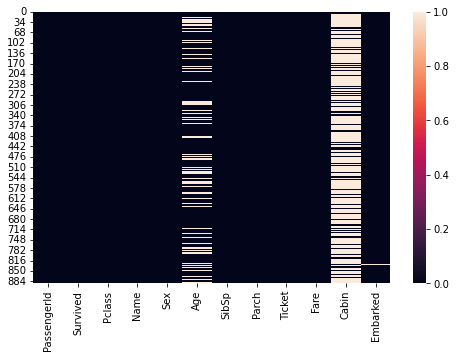

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull()) #heatmap representing null values

## Checking the percentage of null values

In [24]:
Missing_Cabin=df['Cabin'].isnull().sum()
Total_Cabin=len(df['Cabin'])

In [25]:
Missing_Age=df['Age'].isnull().sum()
Total_Missing_Age=len(df['Age'])

In [26]:
print("Missing Cabin Values Percentage",( Missing_Cabin/Total_Cabin)*100)

Missing Cabin Values Percentage 77.10437710437711


In [27]:
print("Age_Missing",(Missing_Age/Total_Missing_Age)*100)

Age_Missing 19.865319865319865


# Imputation

However Cabin Data is Having Maximum blanks. Hence droping the data

In [28]:
df.drop(['Cabin'],axis=1,inplace=True) # droping cabin column

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace=True) # age numerical value replaced by mean value

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

###  Label Encoding:

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List=['Sex','Embarked']

for i in List:
    df[i]=le.fit_transform(df[i].astype(str))

In [33]:
df.drop(['Name'],inplace=True,axis=1)

In [34]:
df['Embarked'].fillna(value=df['Embarked'].mode(),inplace=True)

In [35]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
df['Embarked'].unique() # an addition Embarked point get created

array([2, 0, 1, 3])

In [37]:
df["Embarked"] = df["Embarked"].replace(3, 2)

In [38]:
df['Embarked'].unique()

array([2, 0, 1])

In [43]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

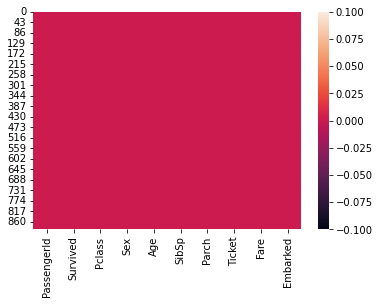

In [40]:
sns.heatmap(df.isnull())

In [41]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
880,881,1,2,0,25.0,0,1,230433,26.0000,2
862,863,1,1,0,48.0,0,0,17466,25.9292,2
660,661,1,1,1,50.0,2,0,PC 17611,133.6500,2
769,770,0,3,1,32.0,0,0,8471,8.3625,2
299,300,1,1,0,50.0,0,1,PC 17558,247.5208,0


# EDA(Exploratory Data Analysis)

### Univariate

Max 891 Min 1


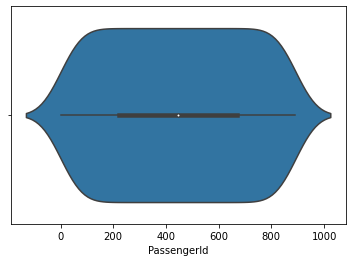

In [44]:
sns.violinplot(x='PassengerId',data=df)
print("Max",df['PassengerId'].max(),"Min",df['PassengerId'].min())

Total 891 Passenger was on board 

0    549
1    342
Name: Survived, dtype: int64

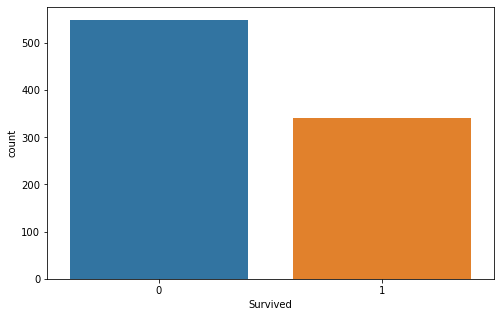

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived',data=df)
df['Survived'].value_counts()

CountPlot Survived Count Shows

1. Dead is 549
2. Survived is 342

3    491
1    216
2    184
Name: Pclass, dtype: int64

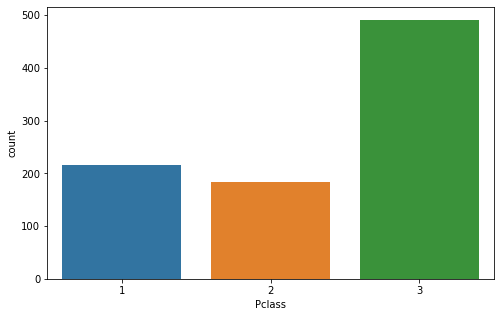

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass',data=df)
df['Pclass'].value_counts()

Countplot Shows:

    1. First Class Passenger = 216
    2. Second Class Passenger= 184
    3. Third Class Passenger = 491

<AxesSubplot:xlabel='Sex', ylabel='count'>

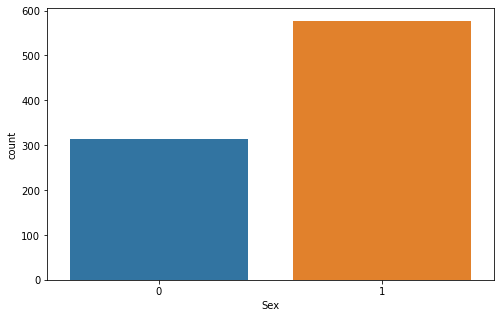

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Age'>

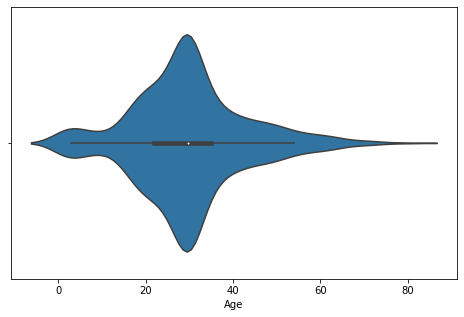

In [48]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Age',data=df,split=True)

Maximum Age Between Age range 18 to 40.

1    577
0    314
Name: Sex, dtype: int64

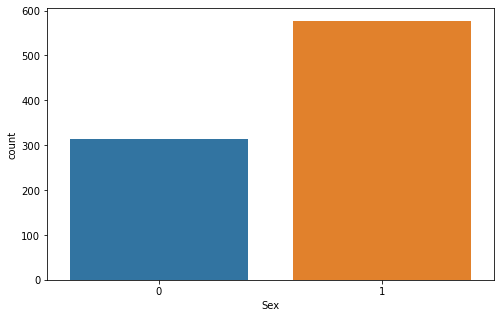

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',data=df)
df['Sex'].value_counts()

Sex on Board

1. Male count is 577 
2. Female count is 314

<AxesSubplot:xlabel='SibSp', ylabel='count'>

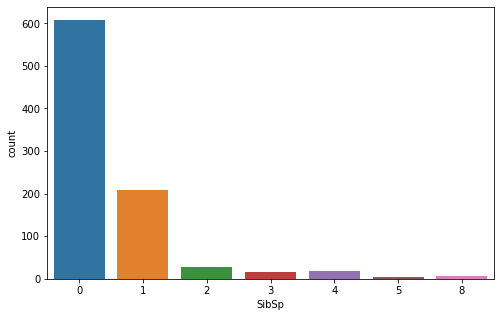

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp',data=df)

Maximum were Travelling without Sibling or Spouse

<AxesSubplot:xlabel='Parch', ylabel='count'>

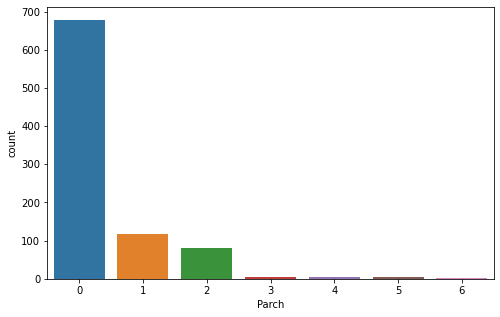

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x='Parch',data=df)

Maximum are traveling alone with, No parents

Maximum Fare 512.3292 Minimum Fare 0.0


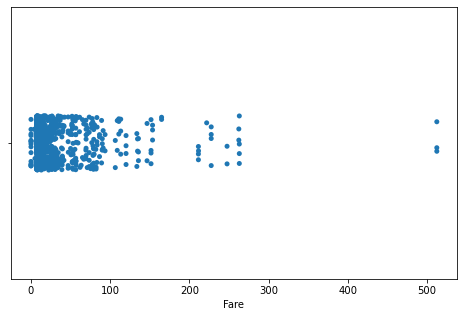

In [52]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Fare',data=df)
print("Maximum Fare",df["Fare"].max(),"Minimum Fare",df['Fare'].min())

Maximum payment was done from range 0 to 40 and Maximum Fare paid by customer 512.32 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

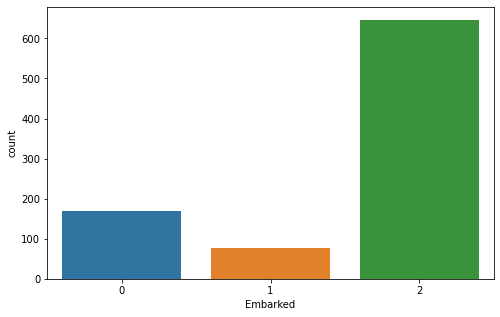

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=df)

# Bivariate

<AxesSubplot:xlabel='Survived', ylabel='count'>

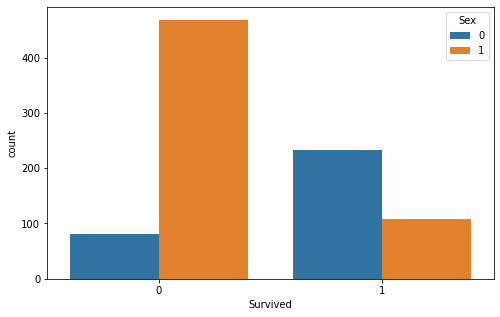

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

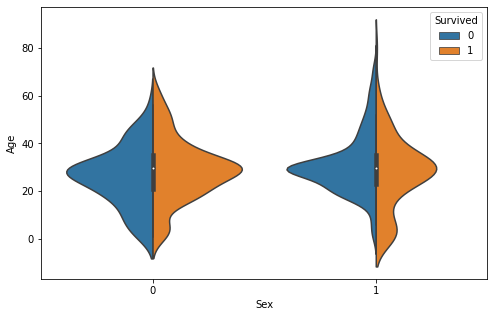

In [55]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Sex',y='Age',data=df,hue='Survived',split=True)

Maximum Survival is for Women as compare to man.

<Figure size 576x360 with 0 Axes>

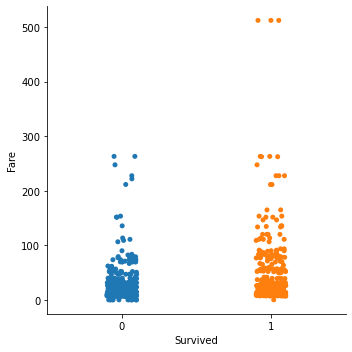

In [56]:
plt.figure(figsize=(8,5))
sns.catplot(x='Survived',y='Fare',data=df)

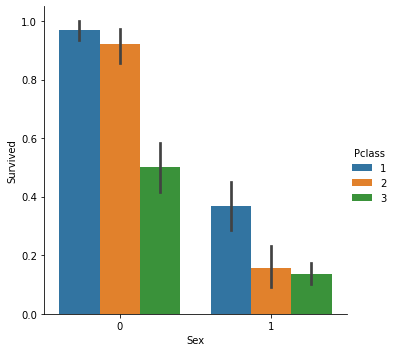

In [57]:
sns.catplot(data=df, x="Sex", y="Survived", hue="Pclass", kind="bar")

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

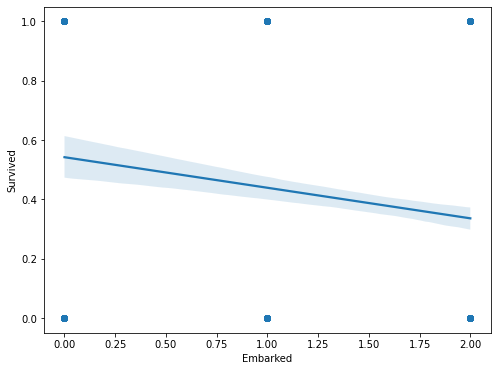

In [60]:
plt.figure(figsize=(8,6))
sns.regplot(y='Survived',x='Embarked',data=df)

Survival is more For Passengers Embarked At 

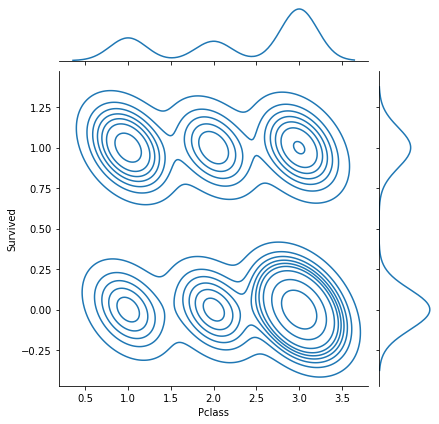

In [61]:
sns.jointplot(y='Survived',x='Pclass',kind='kde',data=df)

At Pclass-1 is survived more followed by Pclass-3

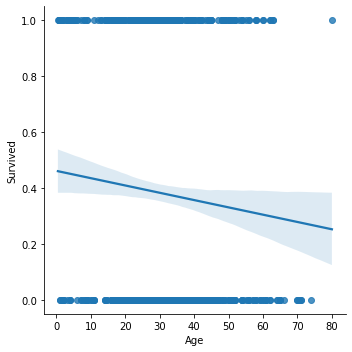

In [62]:
sns.lmplot(y='Survived',x='Age',data=df)

Younger Age Passenger Survived More than Old aged Passenger

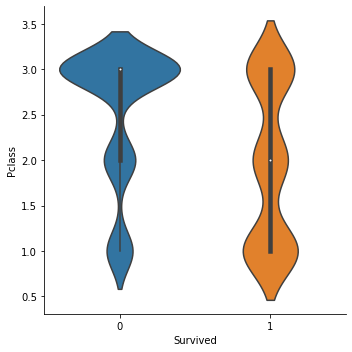

In [63]:
sns.catplot(x='Survived',y='Pclass',data=df,kind='violin')

High fare paying people have survived

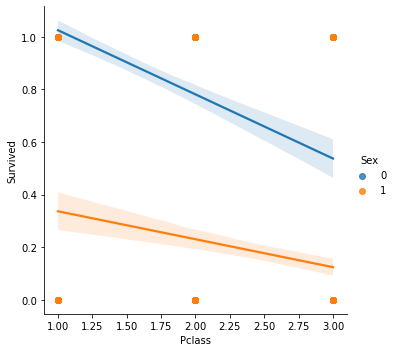

In [64]:
sns.lmplot(x='Pclass',y='Survived',hue='Sex',data=df)

P_class with 1 has survived More

<Figure size 720x576 with 0 Axes>

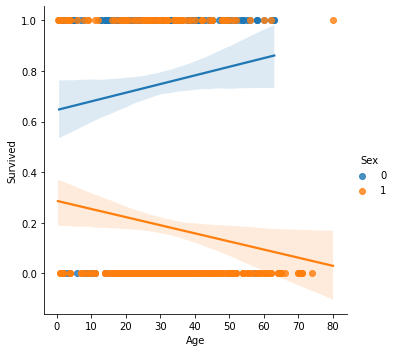

In [65]:
plt.figure(figsize=(10,8))
sns.lmplot(x='Age',y='Survived',hue='Sex',data=df)

As per the Age Old Male survival is more compare to female survival.

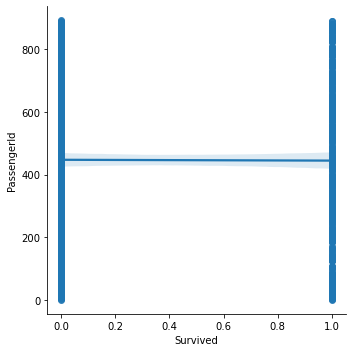

In [66]:
sns.lmplot(y='PassengerId',x='Survived',data=df)

# Multiple Variate Analysis

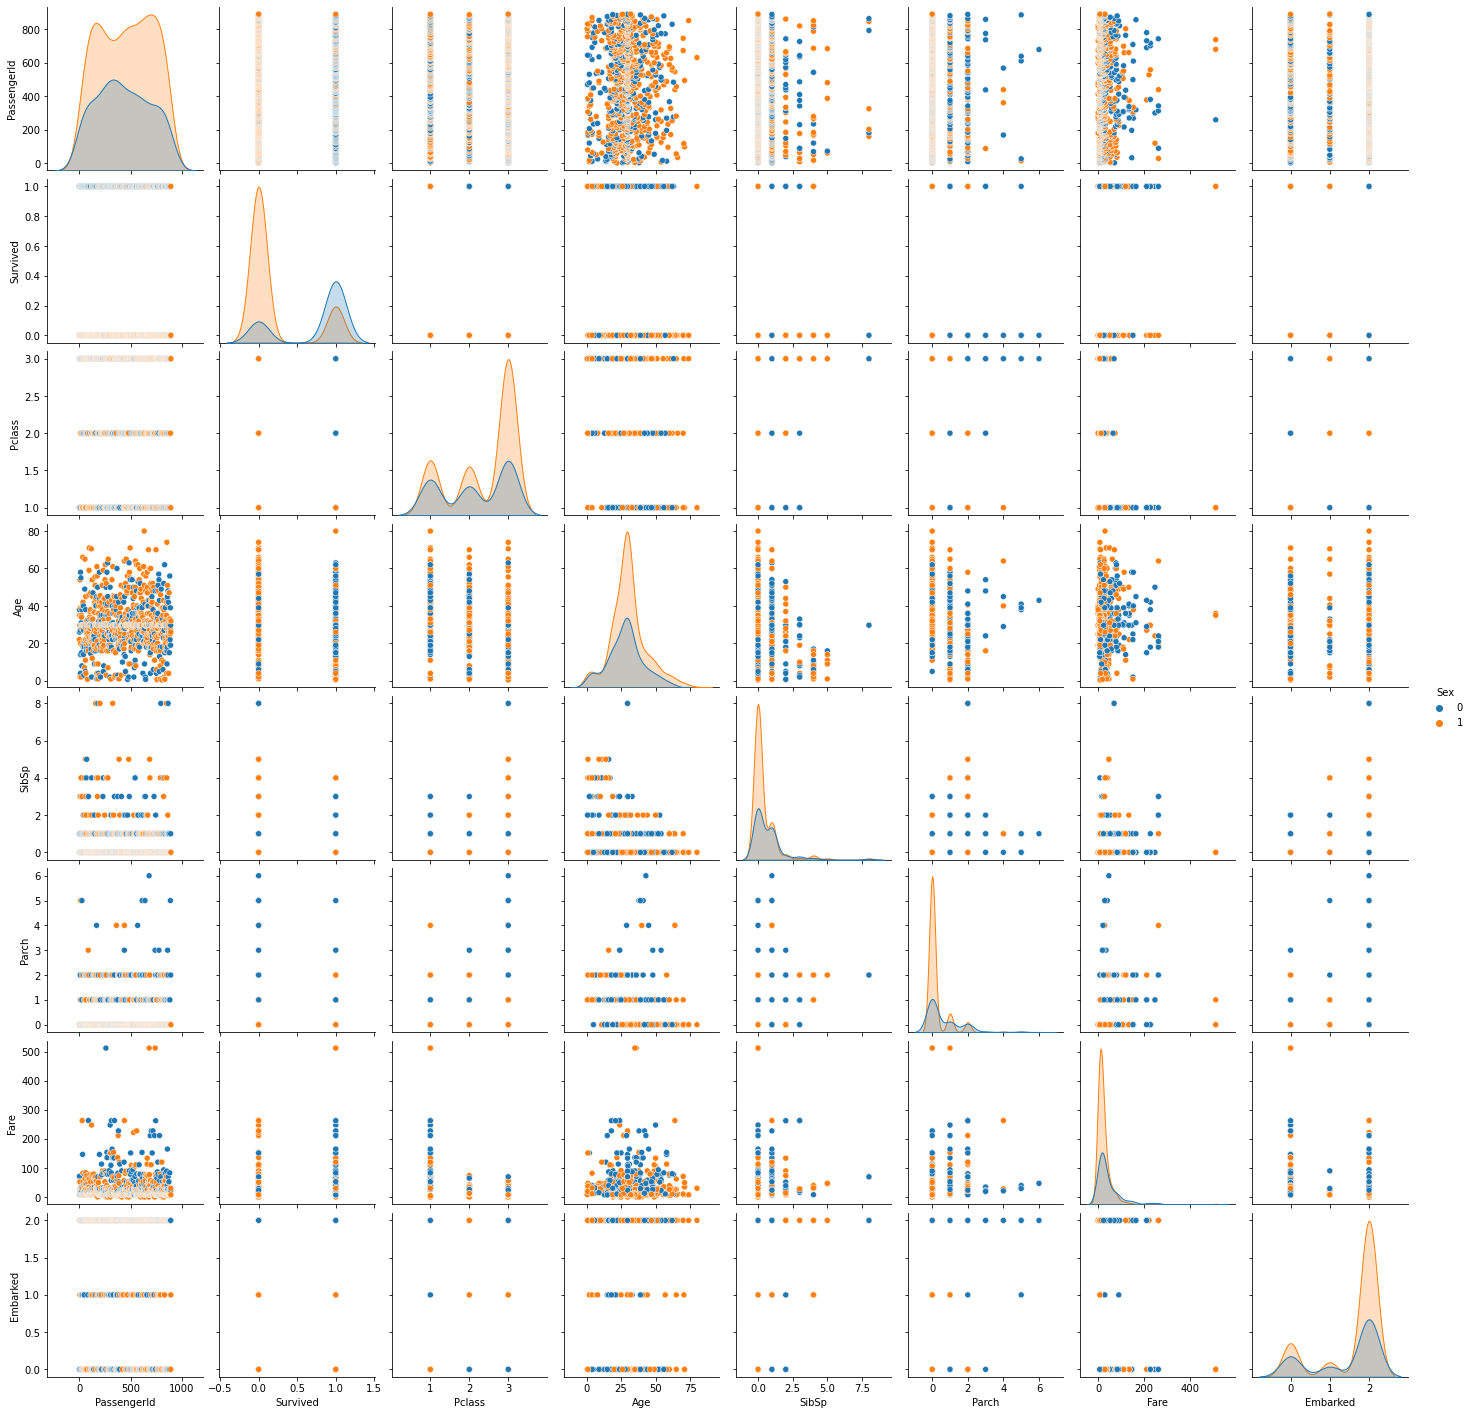

In [67]:
sns.pairplot(df,hue='Sex')

# Statistical Description

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Text(0.5, 1.0, 'DESCRIPTION CHART')

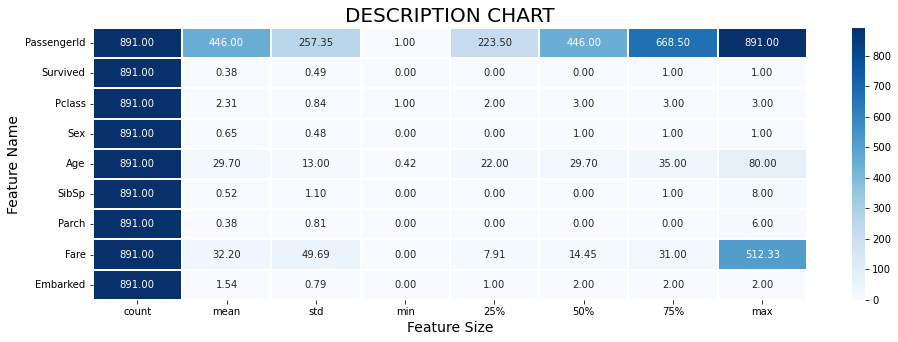

In [69]:
plt.figure(figsize=(16,5))
sns.heatmap(round(df.describe()[:].transpose(),2),annot=True,square=False,fmt=('0.2f'),linewidth=0.02,linecolor='white',cmap='Blues')
plt.xlabel('Feature Size',fontsize=14)
plt.ylabel("Feature Name",fontsize=14)
plt.title("DESCRIPTION CHART",fontsize=20)

## Columns Observation:

   1. Null Value: No Null Values
   2. Right Skewed: Survived,SibSP,Parch,Fair
   3. Left Skewed: Pclass, Sex, Embarked
   4. Maximum Deviation: Passenger Id, Age
   5. Outliers: Age, Fare, Passenger Id.

# Correlation:

In [70]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


Text(0.5, 1.0, 'Correlation Map')

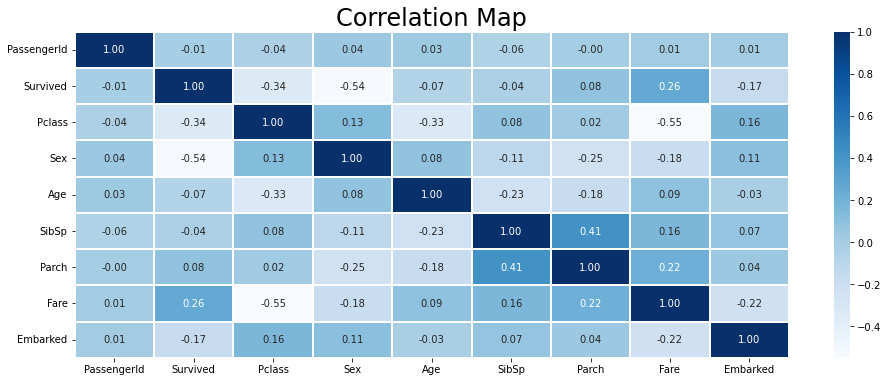

In [71]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.02,linecolor='white',fmt='0.2f',cmap='Blues')
plt.title("Correlation Map",fontsize=24)

In [72]:
df.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

## Observation:

1. Sex has 54 percent negatively correlated with the Target Variable.
2. Pclass is 33 percent negatively correlated with the Target Variable
3. Embarked is 16 percentage negatively correlated with Target Variable
4. Age is 6 percent negative correlation with Target Variable.
5. SibSp has 3 precent relation negative correlation with Taregt Variable.
6. PassengerId has Zero relation with but negative correlation Target Value.
7. Parch has 10 percentage positive correlation with target variable.
8. Fare has 30 percentage positive relation with Target Variable. 
9. Survived is 100 percent positive relation with Target Variable.



Text(0.5, 1.0, 'CORRELATION')

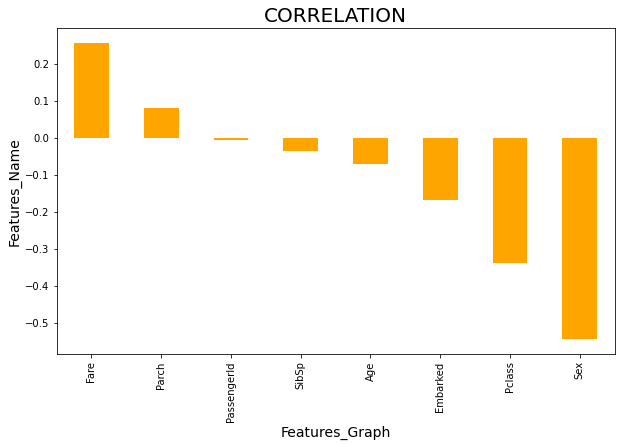

In [73]:
plt.figure(figsize=(10,6))
df.corr()['Survived'].sort_values(ascending=False).drop('Survived').plot(kind='bar',color='orange')
plt.xlabel("Features_Graph",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.title("CORRELATION",fontsize=20)

# Outliers:

<AxesSubplot:xlabel='Sex'>

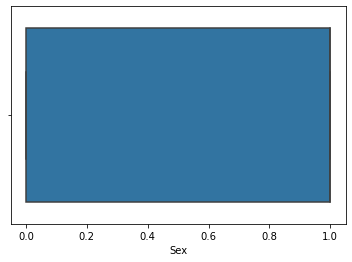

In [74]:
sns.boxplot(x='Sex',data=df)

Graph shows within the box

<AxesSubplot:xlabel='Fare'>

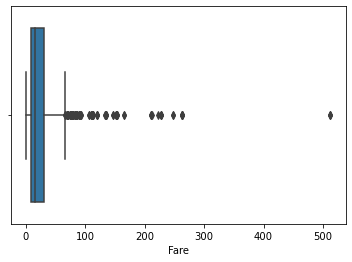

In [75]:
sns.boxplot(x='Fare',data=df)

Graph shows a lot of outliers is present

<AxesSubplot:xlabel='Parch'>

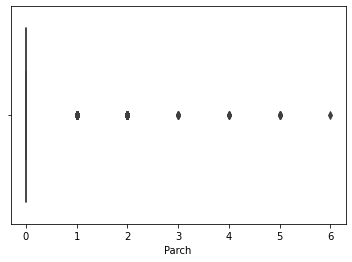

In [76]:
sns.boxplot(x='Parch',data=df)

Graph shows variable having a lot of Outlier

<AxesSubplot:xlabel='PassengerId'>

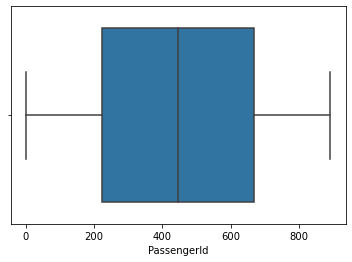

In [77]:
sns.boxplot(data=df,x='PassengerId')

Graph Shows No outliers is present 

<AxesSubplot:xlabel='SibSp'>

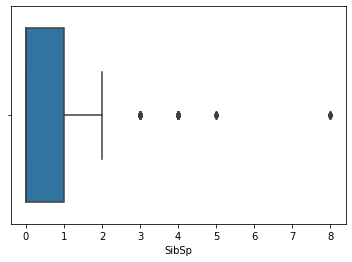

In [78]:
sns.boxplot(data=df,x='SibSp')

Graph Shows Outliers are present

<AxesSubplot:xlabel='Age'>

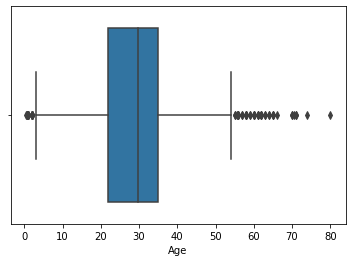

In [79]:
sns.boxplot(data=df,x='Age')

Outliers are present in Age column

<AxesSubplot:xlabel='Embarked'>

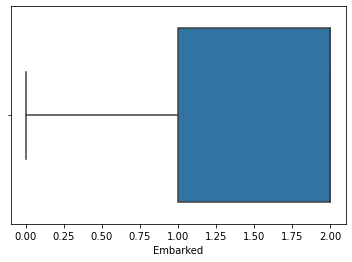

In [80]:
sns.boxplot(x='Embarked',data=df)

Graph shows no outlier

<AxesSubplot:xlabel='Pclass'>

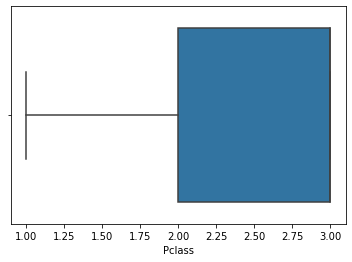

In [81]:
sns.boxplot(x='Pclass',data=df)

Outliers are Present in Parch Column

# Skewness

In [82]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

Outcome shows: Skewness Threshold is taken is(+/-65)
1. SibSp
2. Parch
3. Fare

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

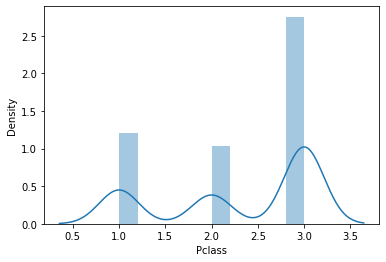

In [83]:
sns.distplot(df['Pclass'])

This graph is not equally distributed, as the graph lies beyond the normal curve. It is Trimodal, 3 modes in graph

<AxesSubplot:xlabel='Sex', ylabel='Density'>

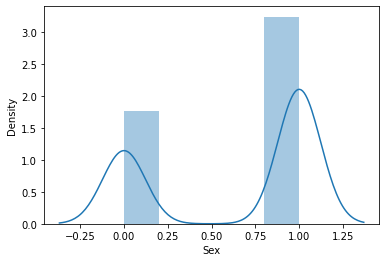

In [84]:
sns.distplot(df['Sex'])

The building Blocks are beyond the normal Curve as it don't follow the normal curve. This is a Bimodal Graph

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

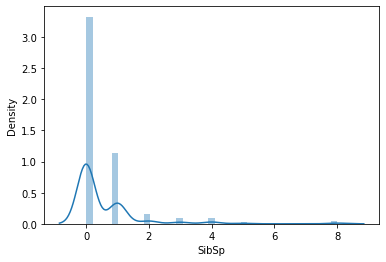

In [85]:
sns.distplot(df['SibSp'])

The building blocks in the graph is not equally distributed, as the graph lies beyond the normal curve. It is Trimodal, 3 modes in graph

<AxesSubplot:xlabel='Parch', ylabel='Density'>

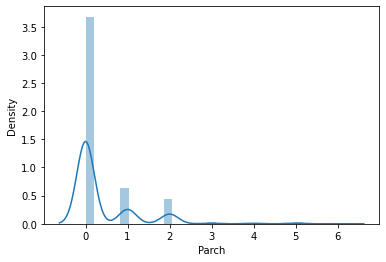

In [86]:
sns.distplot(df['Parch'])

The building blocks in the graph is not equally distributed, as the graph lies beyond the normal curve. It is Trimodal, 3 modes in graph

<AxesSubplot:xlabel='Fare', ylabel='Density'>

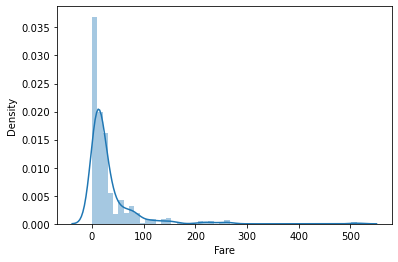

In [87]:
sns.distplot(df['Fare'])

The building blocks graph is not equally distributed, as the graph lies beyond the normal curve.

# Data Cleansing

## Correlation 

In [89]:
df.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

#We will delete Sex as its very negatively related with target variable, SibSp and PassengerId is Not so good correlated 

In [90]:
delete={'Columns':['Sex','PassengerId','SibSp'],"Values":['-0.543351','-0.005007','-0.035322'],
        'Outliers':['No','Yes','yes'],'Normal_Distribution':['No','Yes','No']}

In [91]:
df.drop(['Sex','PassengerId','SibSp'],axis=1,inplace=True)

In [92]:
df.sample(5)

,Survived,Pclass,Age,Parch,Ticket,Fare,Embarked
311,1,1,18.000000,2,PC 17608,262.3750,0
803,1,3,0.420000,1,2625,8.5167,0
821,1,3,27.000000,0,315098,8.6625,2
826,0,3,29.699118,0,1601,56.4958,2
808,0,2,39.000000,0,248723,13.0000,2


In [93]:
df.drop(['Ticket'],axis=1,inplace=True) # Ticket is categorical 

### Removing Outliers

In [94]:
from scipy.stats import zscore

In [95]:
z=np.abs(zscore(df))
z.head() # turned to positive

,Survived,Pclass,Age,Parch,Fare,Embarked
0,0.789272,0.827377,0.592481,0.473674,0.502445,0.585954
1,1.266990,1.566107,0.638789,0.473674,0.786845,1.942303
2,1.266990,0.827377,0.284663,0.473674,0.488854,0.585954
3,1.266990,1.566107,0.407926,0.473674,0.420730,0.585954
4,0.789272,0.827377,0.407926,0.473674,0.486337,0.585954


In [96]:
print(np.where(z>3))

(array([ 13,  25,  27,  86,  88,  96, 116, 118, 167, 258, 299, 311, 341,
       360, 377, 380, 437, 438, 438, 493, 527, 557, 567, 610, 630, 638,
       672, 678, 679, 689, 700, 716, 730, 736, 737, 742, 745, 774, 779,
       851, 858, 885], dtype=int64), array([3, 3, 4, 3, 4, 2, 2, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 2, 4, 4,
       3, 3, 2, 3, 2, 3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 3, 4, 2, 3, 3],
      dtype=int64))


In [97]:
z.iloc[13,3] #checked sample

5.73284383018578

In [98]:
new_df=df[(z<3).all(axis=1)]

In [99]:
new_df

,Survived,Pclass,Age,Parch,Fare,Embarked
0,0,3,22.000000,0,7.2500,2
1,1,1,38.000000,0,71.2833,0
2,1,3,26.000000,0,7.9250,2
3,1,1,35.000000,0,53.1000,2
4,0,3,35.000000,0,8.0500,2
...,...,...,...,...,...,...
886,0,2,27.000000,0,13.0000,2
887,1,1,19.000000,0,30.0000,2
888,0,3,29.699118,2,23.4500,2
889,1,1,26.000000,0,30.0000,0


### Calculate DataLoss Percentage

In [100]:
print("Old DataFrame ",df.shape)
print("New DataFrame ",new_df.shape)

Old DataFrame  (891, 6)
New DataFrame  (850, 6)


In [101]:
print(" Data Loss percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

 Data Loss percentage  4.601571268237935


In [102]:
x=df.drop(['Survived'],axis=1)

In [103]:
x.sample()

,Pclass,Age,Parch,Fare,Embarked
50,3,7.0,1,39.6875,2


In [104]:
x.shape

(891, 5)

In [105]:
y=df.iloc[:,0]

In [106]:
y.sample()

436    0
Name: Survived, dtype: int64

In [107]:
y.shape

(891,)

# Checking Mulicolinarity:

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns #columns
    vif['vif_factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
    
calc_vif(x)  

,Variable,vif_factor
0,Pclass,4.923518
1,Age,4.298528
2,Parch,1.366370
3,Fare,1.604776
4,Embarked,4.515178


# Remove Skewness

In [109]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [110]:
x

array([[ 0.86397329, -0.55626693, -0.56025296, -0.87882001,  0.61041095],
       [-1.45912855,  0.65726854, -0.56025296,  1.33665056, -1.78052001],
       [ 0.86397329, -0.24157742, -0.56025296, -0.79006485,  0.61041095],
       ...,
       [ 0.86397329,  0.04200106,  1.84685634,  0.28888536,  0.61041095],
       [-1.45912855, -0.24157742, -0.56025296,  0.52790578, -1.78052001],
       [ 0.86397329,  0.21525442, -0.56025296, -0.81234947, -1.23633916]])

# Standardization

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [112]:
x

array([[ 0.86397329, -0.55626693, -0.56025296, -0.87882001,  0.61041095],
       [-1.45912855,  0.65726854, -0.56025296,  1.33665056, -1.78052001],
       [ 0.86397329, -0.24157742, -0.56025296, -0.79006485,  0.61041095],
       ...,
       [ 0.86397329,  0.04200106,  1.84685634,  0.28888536,  0.61041095],
       [-1.45912855, -0.24157742, -0.56025296,  0.52790578, -1.78052001],
       [ 0.86397329,  0.21525442, -0.56025296, -0.81234947, -1.23633916]])

In [113]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


### Checking Unique Values in column

In [114]:
y.unique()

array([0, 1], dtype=int64)

In [115]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [116]:
# Data is Imbalance so we will use SMOTE technique:

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)


In [117]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

### However the unique value is Two we will classification:

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [119]:
lg=LogisticRegression()

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train) #sent for training
    pred_train=lg.predict(x_train) #predict(x_training data)
    pred_test=lg.predict(x_test)  #predict(x_test dataset)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The random state:-",i)
        print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100,"\n")

The random state:- 81
Training accuracy_score is  68.22323462414579
Testing accuracy_score is  68.18181818181817 

The random state:- 245
Training accuracy_score is  67.65375854214123
Testing accuracy_score is  67.72727272727272 

The random state:- 354
Training accuracy_score is  68.22323462414579
Testing accuracy_score is  68.18181818181817 

The random state:- 397
Training accuracy_score is  68.56492027334852
Testing accuracy_score is  68.63636363636364 

The random state:- 471
Training accuracy_score is  67.65375854214123
Testing accuracy_score is  67.72727272727272 

The random state:- 701
Training accuracy_score is  67.65375854214123
Testing accuracy_score is  67.72727272727272 

The random state:- 736
Training accuracy_score is  67.3120728929385
Testing accuracy_score is  67.27272727272727 

The random state:- 756
Training accuracy_score is  69.13439635535308
Testing accuracy_score is  69.0909090909091 

The random state:- 805
Training accuracy_score is  68.56492027334852
Testin

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=397,test_size=0.20)
lg.fit(x_train,y_train)

pred_train=lg.predict(x_train)
pred_test =lg.predict(x_test)

print("Accuracy_Score ", accuracy_score(y_test,pred_test))
print("Confusion_Matrix ","\n" ,confusion_matrix(y_test,pred_test))
print("CLassification_report ",classification_report(y_test,pred_test))

Accuracy_Score  0.6863636363636364
Confusion_Matrix  
 [[74 42]
 [27 77]]
CLassification_report                precision    recall  f1-score   support

           0       0.73      0.64      0.68       116
           1       0.65      0.74      0.69       104

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



# Cross Validation with Logistic Regression

In [140]:
from sklearn.model_selection import cross_val_score

lss=accuracy_score(y_test,pred_test)
lss

0.7181818181818181

In [141]:
for i in range(2,10):
    lg_Mean_score = cross_val_score(lg,x,y,cv=i)
    lsc=lg_Mean_score.mean()
    
    print("At Cv :",i,"Cross Validation Score is ",lsc*100,"Accuracy Score is ",lss*100,"\n")

At Cv : 2 Cross Validation Score is  67.85063752276868 Accuracy Score is  71.81818181818181 

At Cv : 3 Cross Validation Score is  67.94171220400727 Accuracy Score is  71.81818181818181 

At Cv : 4 Cross Validation Score is  67.67451891174518 Accuracy Score is  71.81818181818181 

At Cv : 5 Cross Validation Score is  67.85512660855126 Accuracy Score is  71.81818181818181 

At Cv : 6 Cross Validation Score is  67.57741347905282 Accuracy Score is  71.81818181818181 

At Cv : 7 Cross Validation Score is  67.5806677399034 Accuracy Score is  71.81818181818181 

At Cv : 8 Cross Validation Score is  67.77610282450016 Accuracy Score is  71.81818181818181 

At Cv : 9 Cross Validation Score is  67.94171220400729 Accuracy Score is  71.81818181818181 



In [125]:
lg_Mean_score =cross_val_score(lg,x,y,cv=3).mean()

print("The cv score is: ",lg_Mean_score*100,"\nThe Accuracy score is: ",lss*100)

The cv score is:  67.94171220400727 
The Accuracy score is:  68.63636363636364


## Model Selection

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knc=KNeighborsClassifier()
sgd=SGDClassifier()

model=[dtc,svc,gnb,knc,sgd]

for m in model:
    m.fit(x_train,y_train)
    ms=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    print("Accuracy_Score ",m , accuracy_score(y_test,pred_test)*100)
    print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
    print("CLassification_report ",classification_report(y_test,pred_test),"\n")
    print('*'*100)

Accuracy_Score  DecisionTreeClassifier() 69.0909090909091
Confusion_Matrix  
 [[73 43]
 [25 79]]
CLassification_report                precision    recall  f1-score   support

           0       0.74      0.63      0.68       116
           1       0.65      0.76      0.70       104

    accuracy                           0.69       220
   macro avg       0.70      0.69      0.69       220
weighted avg       0.70      0.69      0.69       220
 

****************************************************************************************************
Accuracy_Score  SVC() 64.54545454545455
Confusion_Matrix  
 [[66 50]
 [28 76]]
CLassification_report                precision    recall  f1-score   support

           0       0.70      0.57      0.63       116
           1       0.60      0.73      0.66       104

    accuracy                           0.65       220
   macro avg       0.65      0.65      0.64       220
weighted avg       0.66      0.65      0.64       220
 

*******************

# Observation 

    1. DecisionTreeClassifier     64.0909090909091
    2. SVC                        73.18181818181819
    3. GaussianNB                 66.81818181818183
    4. KNeighborsClassifier       70.45454545454545
    5. SGDClassifier()            63.18181818181819

    SVC model is working at best with 73 % 

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#instances
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
mlp=MLPClassifier()

#ensamble_model

check_model=[rf,et,ad,gb,mlp]

for m in check_model:
    
    m.fit(x_train,y_train)
    e_score=m.score(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    print("Model Name ", m )
    print("Accuracy_Score ", accuracy_score(y_test,pred_test)*100)
    print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
    print("CLassification_report ",classification_report(y_test,pred_test),"\n")
    print('*'*100)
    

Model Name  RandomForestClassifier()
Accuracy_Score  71.81818181818181
Confusion_Matrix  
 [[70 46]
 [16 88]]
CLassification_report                precision    recall  f1-score   support

           0       0.81      0.60      0.69       116
           1       0.66      0.85      0.74       104

    accuracy                           0.72       220
   macro avg       0.74      0.72      0.72       220
weighted avg       0.74      0.72      0.72       220
 

****************************************************************************************************
Model Name  ExtraTreesClassifier()
Accuracy_Score  70.0
Confusion_Matrix  
 [[70 46]
 [20 84]]
CLassification_report                precision    recall  f1-score   support

           0       0.78      0.60      0.68       116
           1       0.65      0.81      0.72       104

    accuracy                           0.70       220
   macro avg       0.71      0.71      0.70       220
weighted avg       0.72      0.70      0.70    

Observation on Accuracy_Score 

1. RandomForest
Accuracy_Score  71.81

2. ExtraTreesClassifier
Accuracy_Score  70.0

3. AdaBoostClassifier
Accuracy_Score  70.0

4. GradientBoostingClassifier
Accuracy_Score  71.36

5. MLPClassifier
Accuracy_Score  69.54

`Here Model is working the best at approx 70 percent

# Hyper Parameter -MLPClassifier

In [134]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp=MLPClassifier()

parameter={'activation':['identity', 'logistic', 'tanh', 'relu'],
           'solver':['lbfgs', 'sgd', 'adam'],
           'learning_rate':['constant','invscaling','adaptive'],
           'validation_fraction':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
           'n_iter_no_change':list(range(1,3))}

gsv=GridSearchCV(mlp,parameter)
gsv.fit(x_train,y_train)

print("Best Score",gsv.best_score_," Best Parameters ",gsv.best_params_)

Best Score 0.7391883116883117  Best Parameters  {'activation': 'relu', 'learning_rate': 'invscaling', 'n_iter_no_change': 2, 'solver': 'lbfgs', 'validation_fraction': 0.4}


### Model: MLPClassifier

In [137]:
mlp=MLPClassifier(activation='relu',solver= 'lbfgs',learning_rate='invscaling' ,validation_fraction= 0.4,n_iter_no_change= 2 )
mlp.fit(x_train,y_train)

pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)


print("Model Training Name ", m )
print("Accuracy_Score ", accuracy_score(y_test,pred_test)*100)
print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
print("CLassification_report ",classification_report(y_test,pred_test),"\n")

Model Training Name  MLPClassifier()
Accuracy_Score  71.81818181818181
Confusion_Matrix  
 [[69 47]
 [15 89]]
CLassification_report                precision    recall  f1-score   support

           0       0.82      0.59      0.69       116
           1       0.65      0.86      0.74       104

    accuracy                           0.72       220
   macro avg       0.74      0.73      0.72       220
weighted avg       0.74      0.72      0.71       220
 



### Model Cross Val Score

In [143]:
from sklearn.model_selection import cross_val_score

lss=accuracy_score(y_test,pred_test)
print(lss)

#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and testing_score is {lss}")          

0.7181818181818181
Cross fold 2 the cv_score 0.6794171220400729 and testing_score is 0.7181818181818181
Cross fold 3 the cv_score 0.7122040072859744 and testing_score is 0.7181818181818181
Cross fold 4 the cv_score 0.7067916390179163 and testing_score is 0.7181818181818181
Cross fold 5 the cv_score 0.7268866749688667 and testing_score is 0.7181818181818181
Cross fold 6 the cv_score 0.7112932604735883 and testing_score is 0.7181818181818181
Cross fold 7 the cv_score 0.7295676722428314 and testing_score is 0.7181818181818181
Cross fold 8 the cv_score 0.7277782185549561 and testing_score is 0.7181818181818181
Cross fold 9 the cv_score 0.7258652094717668 and testing_score is 0.7181818181818181


In [145]:
lss=accuracy_score(y_test,pred_test)
print("Accuracy Score MLP model is",lss)

cv_score=cross_val_score(mlp,x,y,cv=3)
cv_mean=cv_score.mean()
print("Cross Validation Score ",cv_mean)

Accuracy Score MLP model is 0.7181818181818181
Cross Validation Score  0.7067395264116576


### AUC ROC CURVE: MLP Classifier

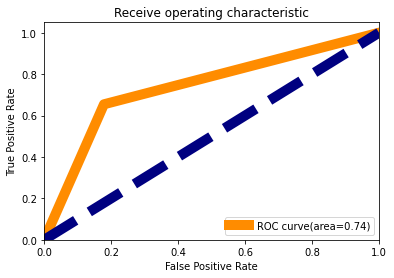

In [146]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter -RandomForestClassifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [150]:
parameter={"criterion" :['gini','entropy', 'log_loss'],
          "max_features":['sqrt','log2', 'None'],
           "class_weight" :['balanced','balanced_subsample','None'],
           "ccp_alpha" :[0.0,0.1,0.2,0.3,0.4]}

gsv=GridSearchCV(rf,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_,)

Best Score  0.7380779220779221 Best Params  {'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_features': 'sqrt'}


### Model: RandomForestClassifier

In [152]:
rf=RandomForestClassifier(ccp_alpha= 0.0, class_weight= 'balanced_subsample', criterion= 'log_loss', max_features= 'sqrt')
rf.fit(x_train,y_train)
rf_score=rf.score(x_train,y_train)

#predict....
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)

#result
print("Model Training Name ", rf_score)
print("Accuracy_Score ", accuracy_score(y_test,pred_test)*100)
print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
print("CLassification_report ",classification_report(y_test,pred_test),"\n")

Model Training Name  MLPClassifier()
Accuracy_Score  73.18181818181819
Confusion_Matrix  
 [[71 45]
 [14 90]]
CLassification_report                precision    recall  f1-score   support

           0       0.84      0.61      0.71       116
           1       0.67      0.87      0.75       104

    accuracy                           0.73       220
   macro avg       0.75      0.74      0.73       220
weighted avg       0.76      0.73      0.73       220
 



### Cross Val Score- RandomForestClassifier

In [154]:
rf_train=accuracy_score(y_train,pred_train)
rf_test=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {rf_train} and testing_score is {rf_test}")          

Cross fold 2 the cv_score 0.7176684881602915 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 3 the cv_score 0.7213114754098361 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 4 the cv_score 0.7359489051094891 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 5 the cv_score 0.7268825238688252 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 6 the cv_score 0.7276867030965392 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 7 the cv_score 0.7323265906068455 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 8 the cv_score 0.7360163440177722 and training_score is 0.9624145785876993 and testing_score is 0.7318181818181818
Cross fold 9 the cv_score 0.7404371584699454 and training_score is 0.9624145785876993 and testing_score is 0.731818181

### AOC_ROC Curve: RandomForestClassifier

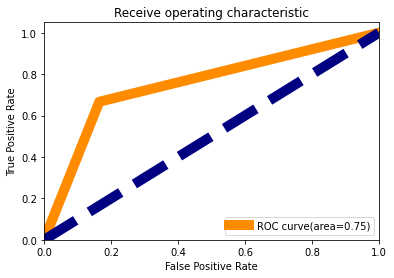

In [155]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning: ExtraTreesClassifier

In [162]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
para={'criterion':['gini','entropy', 'log_loss'],
     'min_samples_split':[1,2,3,4,5],
      'max_features':['sqrt','log2', 'None'],
     'random_state':list(range(1,42)),
     'class_weight':['balanced','balanced_subsample']}

gsv=GridSearchCV(rf,para)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_)

Best Score  0.754025974025974 Best Params  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 5, 'random_state': 37}


### Model: ExtraTreesClassifier

In [164]:
et=ExtraTreesClassifier(class_weight= 'balanced', criterion= 'entropy', max_features = 'sqrt', min_samples_split= 5, random_state= 37)
et.fit(x_train,y_train)
et_score=et.score(x_train,y_train)

pred_train=et.predict(x_train)
pred_test=et.predict(x_test)

#result
print("Model Training Name ", et_score)
print("Accuracy_Score ", accuracy_score(y_test,pred_test)*100)
print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
print("CLassification_report ",classification_report(y_test,pred_test),"\n")

Model Training Name  0.9236902050113895
Accuracy_Score  73.63636363636363
Confusion_Matrix  
 [[72 44]
 [14 90]]
CLassification_report                precision    recall  f1-score   support

           0       0.84      0.62      0.71       116
           1       0.67      0.87      0.76       104

    accuracy                           0.74       220
   macro avg       0.75      0.74      0.73       220
weighted avg       0.76      0.74      0.73       220
 



### Cross Validation Score Extra Tree Classifier

In [165]:
et_train=accuracy_score(y_train,pred_train)
et_test=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(et,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {et_train} and testing_score is {et_test}")          

Cross fold 2 the cv_score 0.7304189435336976 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 3 the cv_score 0.7367941712204007 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 4 the cv_score 0.7332382216323823 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 5 the cv_score 0.7478289746782896 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 6 the cv_score 0.74408014571949 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 7 the cv_score 0.7304892559669629 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 8 the cv_score 0.7496694171162595 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363
Cross fold 9 the cv_score 0.7358834244080146 and training_score is 0.9236902050113895 and testing_score is 0.73636363636

Cross fold 5 the cv_score 0.7478289746782896 and training_score is 0.9236902050113895 and testing_score is 0.7363636363636363

In [167]:
cv_score=cross_val_score(et,x,y,cv=5)
cv_mean=cv_score.mean()

print(" Mean score ",cv_mean," Test Score ",et_test)

 Mean score  0.7478289746782896  Test Score  0.7363636363636363


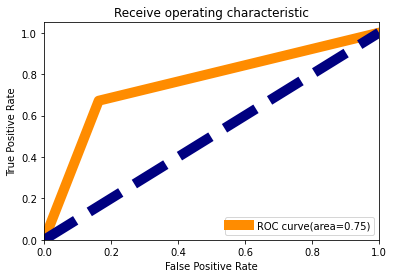

In [168]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter : GradientBoostingClassifier

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

parameter={'loss':['log_loss','deviance','exponential'],
          'learning_rate':[0.1,0.2,0.3,0.4,0.5],
          'criterion':['friedman_mse', 'squared_error', 'mse'],
          'random_state':list(range(40,50)),
          'max_features':['auto','sqrt','log2']}

gsv=GridSearchCV(gbc,parameter)
gsv.fit(x_train,y_train)

print("Best_Param ",gsv.best_params_,"Best_Score ",gsv.best_score_)

Best_Param  {'criterion': 'friedman_mse', 'learning_rate': 0.4, 'loss': 'log_loss', 'max_features': 'sqrt', 'random_state': 41} Best_Score  0.7403506493506493


### Model: GradientBoostingClassfier

In [172]:
gbc=GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.4, loss = 'log_loss', max_features= 'sqrt', random_state=41)
gbc.fit(x_train,y_train)

gbc_score=gbc.score(x_train,y_train)

pred_train=gbc.predict(x_train)
pred_test =gbc.predict(x_test)

#result
print("Model Training Name ", gbc_score)
print("Accuracy_Score ", accuracy_score(y_test,pred_test)*100)
print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
print("CLassification_report ",classification_report(y_test,pred_test),"\n")

Model Training Name  0.8997722095671982
Accuracy_Score  70.45454545454545
Confusion_Matrix  
 [[70 46]
 [19 85]]
CLassification_report                precision    recall  f1-score   support

           0       0.79      0.60      0.68       116
           1       0.65      0.82      0.72       104

    accuracy                           0.70       220
   macro avg       0.72      0.71      0.70       220
weighted avg       0.72      0.70      0.70       220
 



### Cross_Validation: GradientBoostingClassifier

In [173]:
gbc_train=accuracy_score(y_train,pred_train)
gbc_test=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {gbc_train} and testing_score is {gbc_test}")          

Cross fold 2 the cv_score 0.6958105646630237 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 3 the cv_score 0.7167577413479053 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 4 the cv_score 0.7114100862641008 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 5 the cv_score 0.7314196762141967 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 6 the cv_score 0.7249544626593808 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 7 the cv_score 0.7231924126828585 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 8 the cv_score 0.7259798476674071 and training_score is 0.8997722095671982 and testing_score is 0.7045454545454546
Cross fold 9 the cv_score 0.7213114754098361 and training_score is 0.8997722095671982 and testing_score is 0.704545454

In [174]:
cv_score=cross_val_score(gbc,x,y,cv=4)
cv_mean=cv_score.mean()

print(" Mean score ",cv_mean," Test Score ",gbc_test)

 Mean score  0.7114100862641008  Test Score  0.7045454545454546


### AOC_ROC Curve of GradientBoostingClassifier

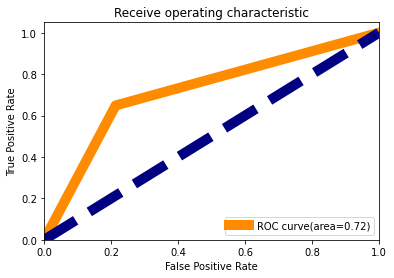

In [175]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Hyperparameter:  AdaBoostClassifier

In [184]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

parameter={'n_estimators':[50,51,52,53,54,55,56,57,58,59,60],
          'algorithm':['SAMME','SAMME.R'],
          'random_state':list(range(39,50))}

gsv=GridSearchCV(ada,parameter)
gsv.fit(x_train,y_train)

print("Best_Param ",gsv.best_params_,"Best_Score ",gsv.best_score_)

Best_Param  {'algorithm': 'SAMME.R', 'n_estimators': 50, 'random_state': 39} Best_Score  0.717525974025974


### Model: AdaBoostClassfier

In [185]:
ada=AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 50, random_state = 39)
ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#score
#result
print("Model Training Name ", gbc_score)
print("Accuracy_Score ", accuracy_score(y_test,pred_test)*100)
print("Confusion_Matrix ", "\n",confusion_matrix(y_test,pred_test))
print("CLassification_report ",classification_report(y_test,pred_test),"\n")

Model Training Name  0.8997722095671982
Accuracy_Score  70.0
Confusion_Matrix  
 [[69 47]
 [19 85]]
CLassification_report                precision    recall  f1-score   support

           0       0.78      0.59      0.68       116
           1       0.64      0.82      0.72       104

    accuracy                           0.70       220
   macro avg       0.71      0.71      0.70       220
weighted avg       0.72      0.70      0.70       220
 



### Cross Validation :AdaBoostClassfier

In [186]:
ada_train=accuracy_score(y_train,pred_train)
ada_test=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {ada_train} and testing_score is {ada_test}")


Cross fold 2 the cv_score 0.6794171220400729 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 3 the cv_score 0.6766848816029144 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 4 the cv_score 0.6867916390179164 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 5 the cv_score 0.6958447488584476 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 6 the cv_score 0.685792349726776 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 7 the cv_score 0.691286950841091 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 8 the cv_score 0.6859330371310696 and training_score is 0.7471526195899773 and testing_score is 0.7
Cross fold 9 the cv_score 0.6821493624772313 and training_score is 0.7471526195899773 and testing_score is 0.7


In [187]:
cv_score=cross_val_score(gbc,x,y,cv=4)
cv_mean=cv_score.mean()

print(" Mean score ",cv_mean," Test Score ",ada_test)

 Mean score  0.7114100862641008  Test Score  0.7


### AOC_ROC_Curve: AdaBoostClassfier

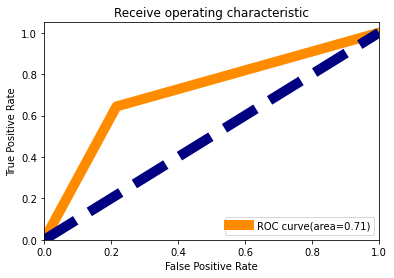

In [188]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

From the Above model :RandomForestClassifier is working the best, Now we will proceed and save the model.

# Saving Model

In [189]:
import pickle
filename='t_train.pkl'
pickle.dump(rf,open(filename,'wb'))

In [190]:
loaded_model=pickle.load(open('t_train.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

73.18181818181819


In [191]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Original'])

In [192]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
Predicted,1,0,0,0,1,1,1,1,1,0,...,1,1,0,0,1,0,0,1,1,1
Original,0,0,0,0,1,1,1,1,1,0,...,1,0,0,0,1,0,0,1,1,1
